In [553]:
import numpy as np
import random
from matplotlib import pyplot as plt
import seaborn as sns

In [301]:
MUIQ    = 100
STDIQ   = 15
MINEQ   = 0
MAXEQ   = 41
MINMBTI = 0
MAXMBTI = 15
SCHMIN  = 42
SCHMAX  = 84
FREEMIN = 21
FREEMAX = 42

In [302]:
def calc_gender(prob):
    if np.random.uniform(low=0, high=1) < prob:
        return 1
    return 0

def calc_school(prob):
    if np.random.uniform(low=0, high=1) < prob:
        return 1
    return 0

def calc_edu(edu_list):
    return random.choice(edu_list)

def calc_age(age_list):
    return random.choice(age_list)

def calc_iq():
    iq = np.random.normal(loc=MUIQ, scale=STDIQ)
    return round(iq)

def calc_eq():
    eq = np.random.randint(low=MINEQ, high=MAXEQ+1)
    return eq

def calc_mbti():
    mbti = np.random.randint(low=MINMBTI, high=MAXMBTI+1)
    return mbti

def school_time():
    time = np.random.randint(low=SCHMIN, high=SCHMAX+1)
    return time

In [328]:
def create_dataset(pop_size, init_pkg_time, feature_size, p_sch, p_gen, pa_edu, age, pkg_list):
    whole_dataset = np.zeros((pop_size, feature_size))
    for idx in range(whole_dataset.shape[0]):
        sch_time = school_time()
        data = np.array([calc_school(p_sch), calc_gender(p_gen), calc_edu(pa_edu), calc_age(age), calc_iq(), calc_eq(), calc_mbti(),
                         sch_time, 84 - sch_time, init_pkg_time, calc_pkg(pkg_list)])
        whole_dataset[idx, :] = data
    return whole_dataset
    

In [744]:
def calculate_grade(data):
    total_grade       = []
    total_emo_rewards = []
    for idx in range(data.shape[0]):
        if idx == 0:
            if data[idx] == 0:
                total_grade.append(np.random.normal(loc=8, scale=2))
                total_emo_rewards.append(np.random.normal(loc=0, scale=3.5))
            else:
                total_grade.append(np.random.normal(loc=5, scale=2))
                total_emo_rewards.append(np.random.normal(loc=0, scale=3))
                
        elif idx == 1:
            if data[idx] == 0:
                total_grade.append(0)
                total_emo_rewards.append(np.random.normal(loc=0, scale=0.5))
            else:
                total_grade.append(0)
                total_emo_rewards.append(np.random.normal(loc=0, scale=0.25))
                
        elif idx == 2:
            total_grade.append(np.random.uniform(low=1, high=5) * data[idx] / np.sum(parentEdu))
            total_emo_rewards.append(0)
        
        elif idx == 3:
            total_grade.append(0)
            total_emo_rewards.append(np.random.uniform(low=-3, high=3) * data[idx] / np.sum(age))
            
        elif idx == 4:
            total_grade.append(data[idx] / 15)
            total_emo_rewards.append(0)
            
        elif idx == 5:
            total_grade.append(0)
            total_emo_rewards.append(data[idx] / np.median(range(1, 42)))
            
        elif idx == 6:
            total_grade.append(0)
            total_emo_rewards.append(np.random.uniform(low=-3, high=3) * data[idx] / np.sum(range(1, 16)))
            
        elif idx == 7:
            t             = np.random.randint(low=20, high=30)
            if t/2 < data[idx + 1]:
                t_edu = data[idx] - round(t / 2)
                t_free  = data[idx+1] - round(t / 2)
            else:
                t_edu = data[idx] - (t - data[idx + 1])
                t_free = 0
                total_grade.append(t_edu / 84 * np.random.normal(loc=30, scale=4))
                total_emo_rewards.append(0)
            
        elif idx == 8:
            total_grade.append(0)
            total_emo_rewards.append(t_free / 42 * np.random.normal(loc=4, scale=2))
            
        elif idx == 9:
            total_grade.append(0)
            total_emo_rewards.append(0)
            
        elif idx == 10:        
            if data[idx] == 1:
                total_grade.append(t / 10 * np.random.normal(loc=10, scale=1))
                total_emo_rewards.append(t / 10 * np.random.normal(loc=0, scale=1))
            elif data[idx] == 2:
                total_grade.append(t / 9 * np.random.normal(loc=10, scale=1))
                total_emo_rewards.append(t / 9 * np.random.normal(loc=-5, scale=1))
            elif data[idx] == 3:
                total_grade.append(t / 8.5 * np.random.normal(loc=8, scale=1))
                total_emo_rewards.append(t / 10 * np.random.normal(loc=0, scale=1))
            elif data[idx] == 4:
                total_grade.append(t / 7 * np.random.normal(loc=7, scale=1))
                total_emo_rewards.append(t / 10 * np.random.normal(loc=0, scale=1))
    
    return total_grade, total_emo_rewards 

In [745]:
p_gender  = 1 / (1 + 1.15)   # Ratio of Men = 1 to Women = 0
p_school  = 0.85             # Ratio of General Public School = 1
parentEdu = range(1, 6) 
age       = range(15, 19)
PKGNUM    = range(1, 5)
INITPKGT  = 0

In [746]:
test_dataset = create_dataset(pop_size=10000, init_pkg_time=0, feature_size=11, p_sch=p_school, p_gen=p_gender, pa_edu=parentEdu, age=age, pkg_list=PKGNUM)

In [747]:
tot_grade = []
tot_emo = []
for idx in range(test_dataset.shape[0]):
    grade, emo_reward = calculate_grade(test_dataset[idx, :])
    tot_grade.append(np.sum(grade) - 70)
    tot_emo.append(np.sum(emo_reward))

In [748]:
min_grade = np.min(tot_grade)
max_grade = np.max(tot_grade)

min_emo = np.min(tot_emo)
max_emo = np.max(tot_emo)

In [749]:
print(max_grade)
print(min_grade)

print(max_emo)
print(min_emo)

6.643910032973054
-51.45297256541681
18.625968817392327
-30.40166344989602


In [750]:
dataset = create_dataset(pop_size=50, init_pkg_time=0, feature_size=11, p_sch=p_school, p_gen=p_gender, pa_edu=parentEdu, age=age, pkg_list=PKGNUM)

In [759]:
PGRADE  = 0.8
PEMO    = 1 - PGRADE
DECEPS  = 0.001
EPISODE = 1000

In [760]:
def select_action(prob, Q, pkg):
    if np.random.uniform(high=0, low=1) < prob:
        return random.choice(pkg)
    else:
        return pkg[np.argmax(Q)]

def epsilon_greedy(data, p_gr, p_em, max_gr, min_gr, max_em, min_em, pkg, reps):
    Qvals             = np.zeros((reps, EPISODE, len(pkg)))
    Nacts             = np.zeros((reps, len(pkg)))
    for rep in range(reps):
        Q = np.zeros(len(pkg))
        N = np.zeros(len(pkg))
        for i in range(EPISODE):
            EPS               = np.exp(-i * DECEPS)
            action            = select_action(EPS, Q, pkg)
            data[-1]          = action
            grade, emo_reward = calculate_grade(data)
            reward            = p_gr * 100 * (np.sum(grade) - 70 - min_gr) / (max_gr - min_gr) + p_em * 100 * (np.sum(emo_reward) - min_em) / (max_em - min_em)
            N[action-1]  += 1
            Q[action-1]  += 1 / N[action-1] * (reward - Q[action-1])
            Qvals[rep, i, :] = Q
    return Qvals, Nacts
    

In [761]:
def plot_Q_overtime(Qvalue):
    Qvalue_mean = np.mean(Qvalue, axis=0)
    sns.set()
    for _ in range(Qvalue_mean.shape[1]):
        plt.plot(Qvalue_mean[:, _], label = "Action " + str(_ + 1))
    plt.xlabel("EPISODE")
    plt.ylabel("Action Value")
    plt.title("Action Value over Time")
    plt.legend()
    plt.show()

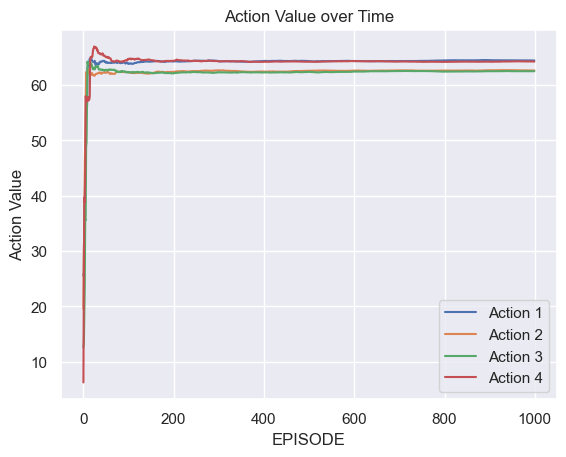

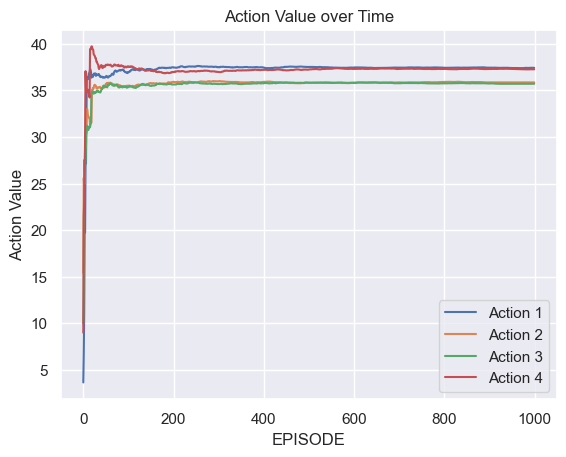

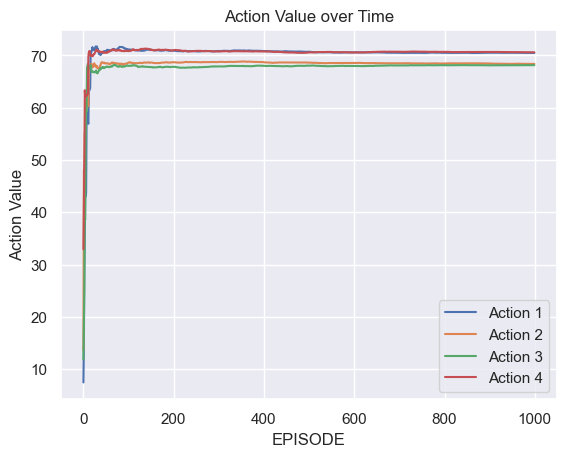

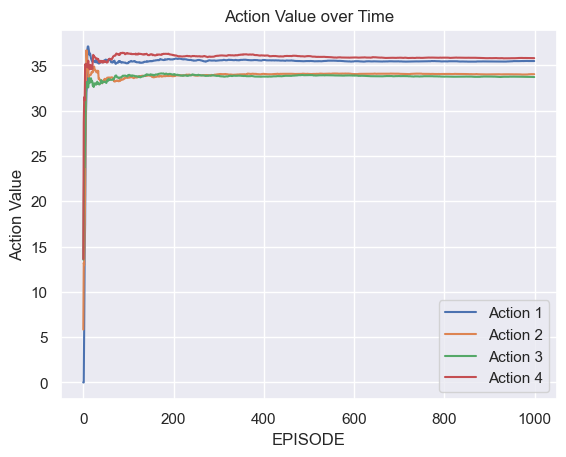

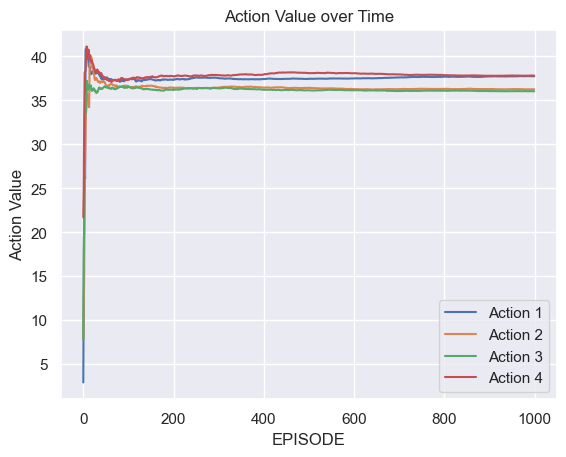

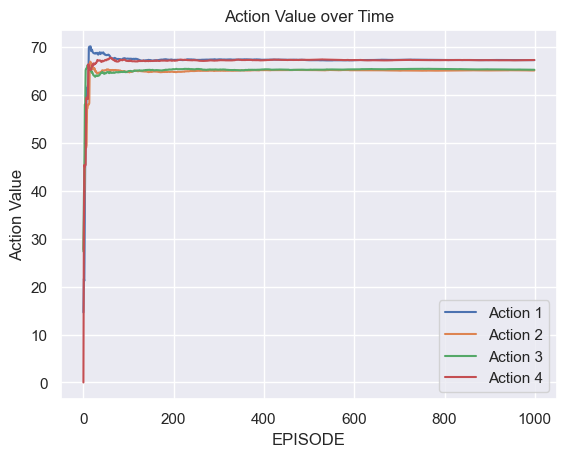

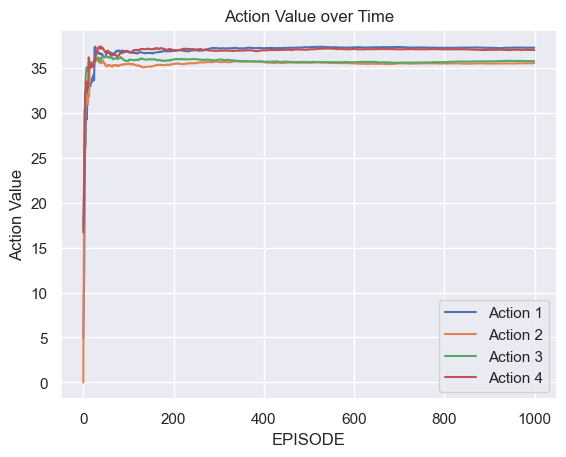

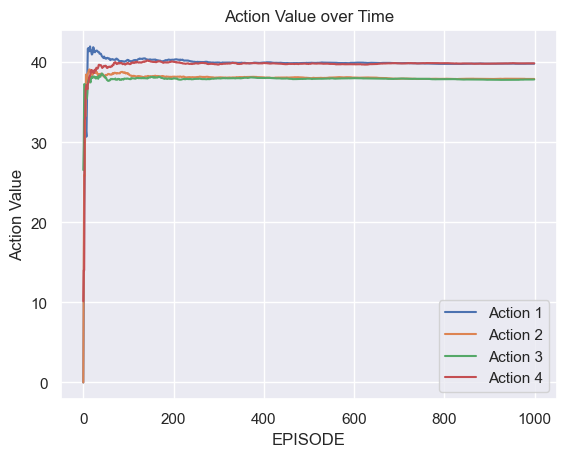

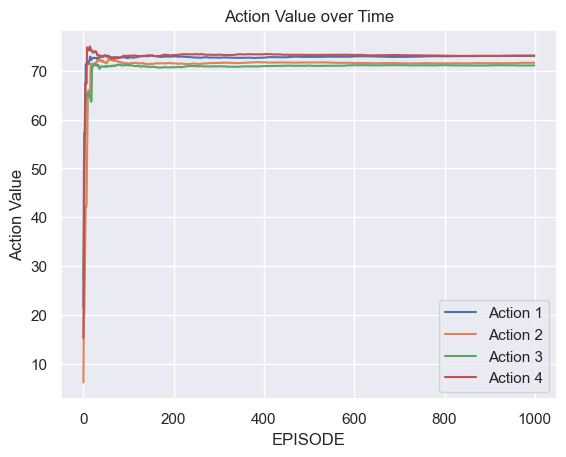

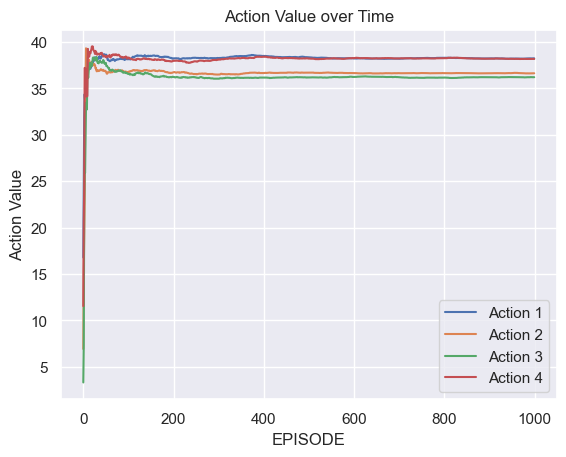

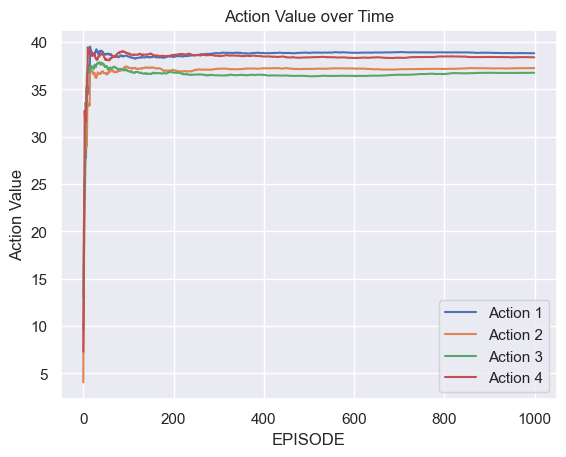

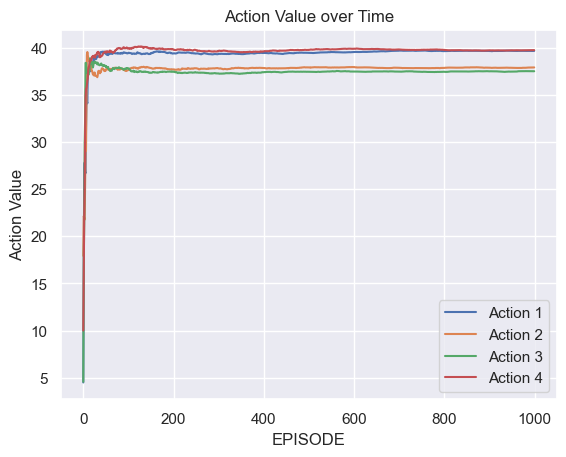

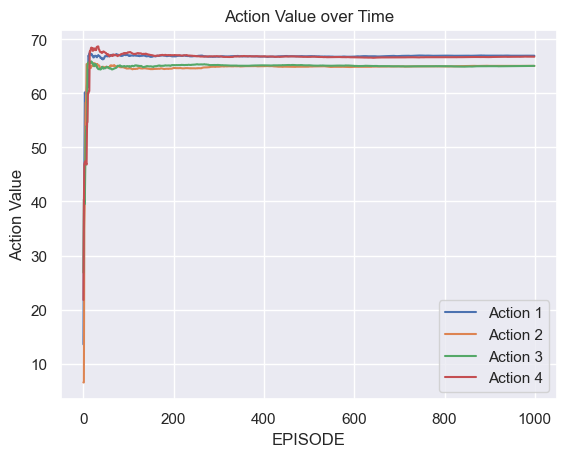

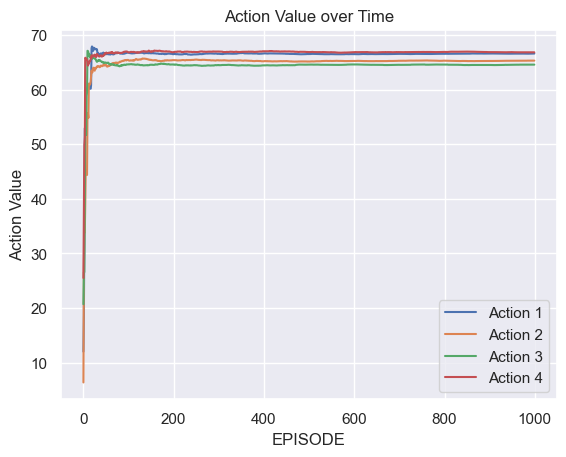

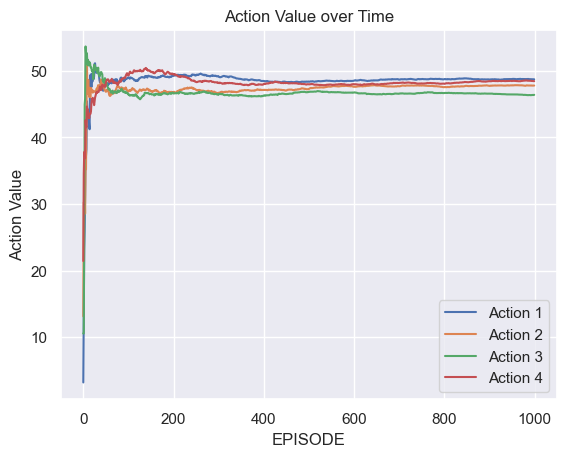

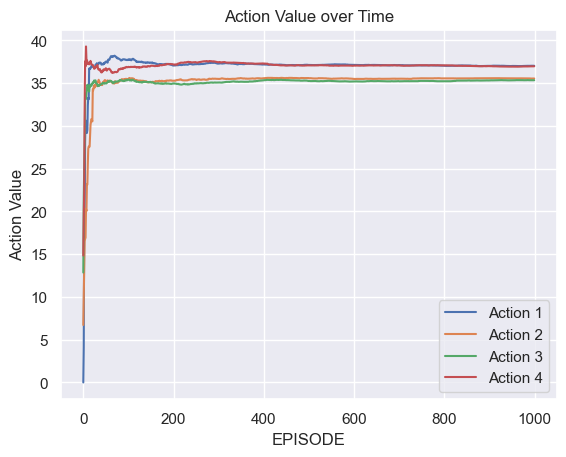

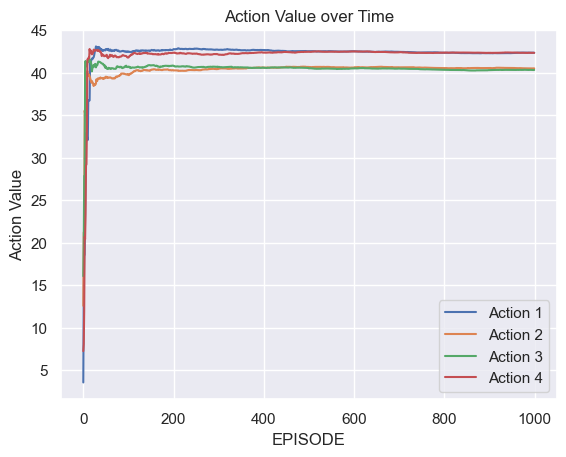

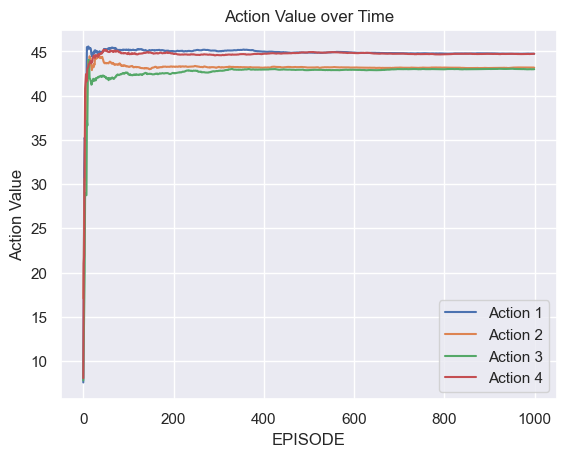

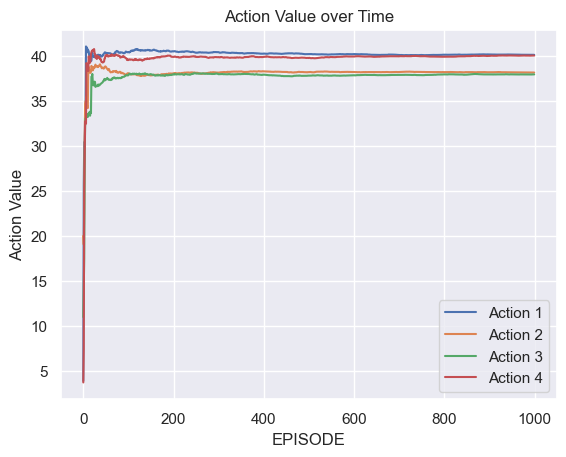

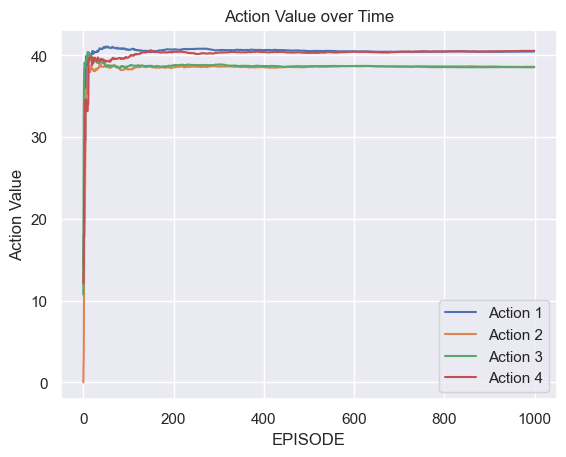

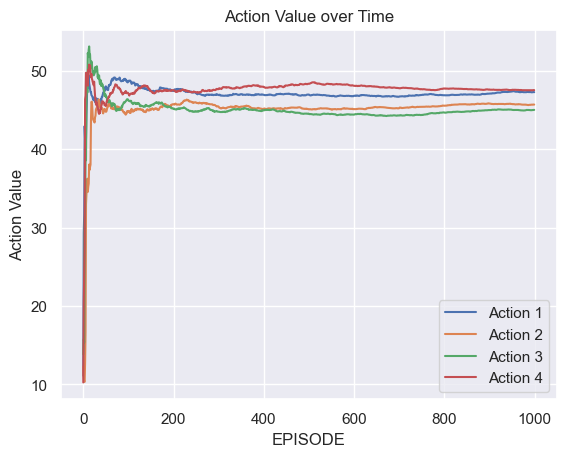

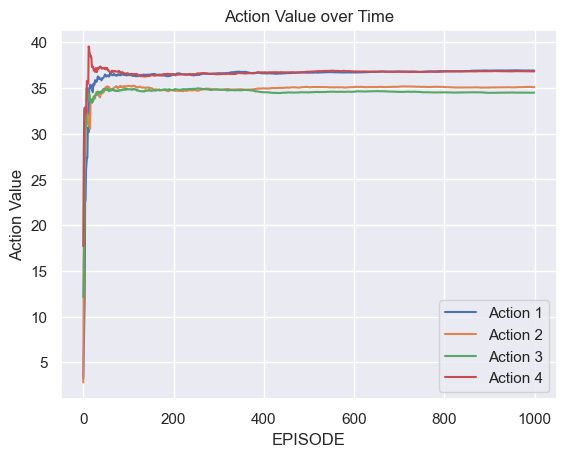

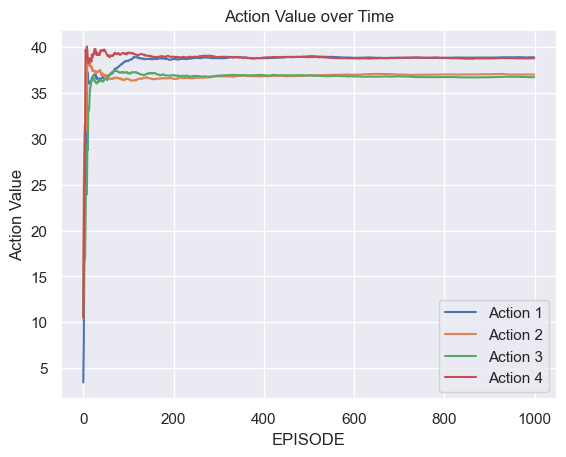

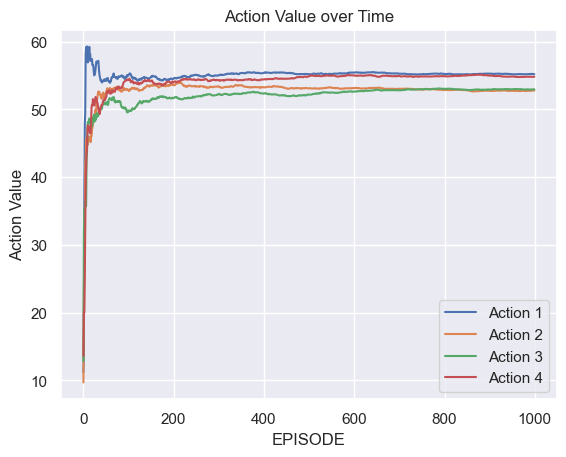

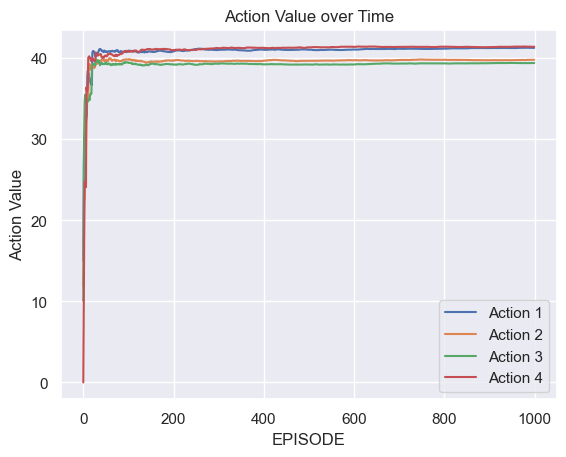

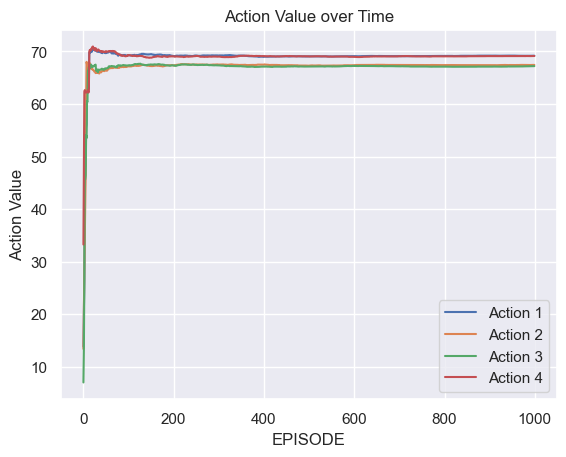

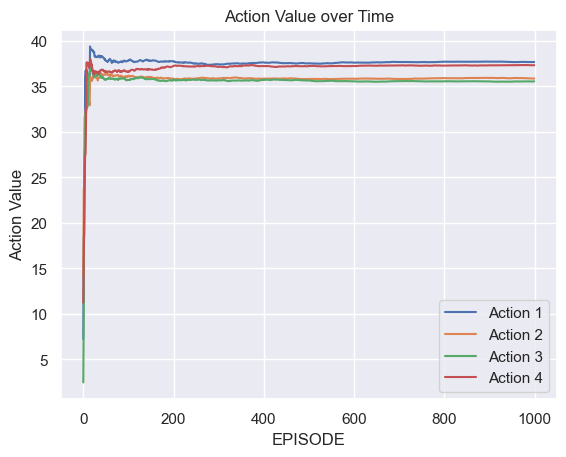

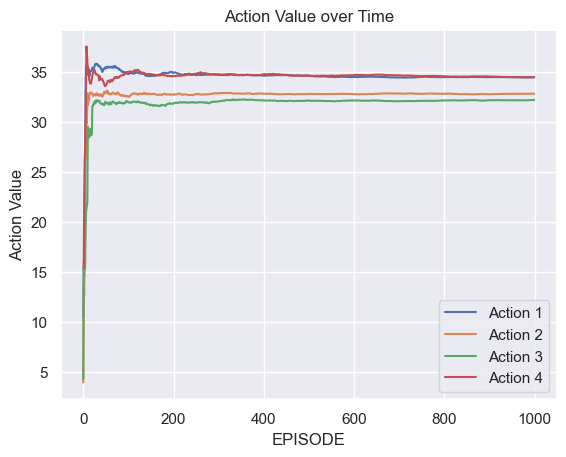

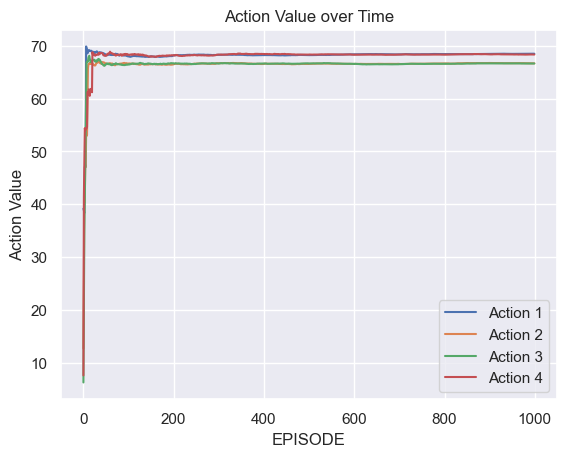

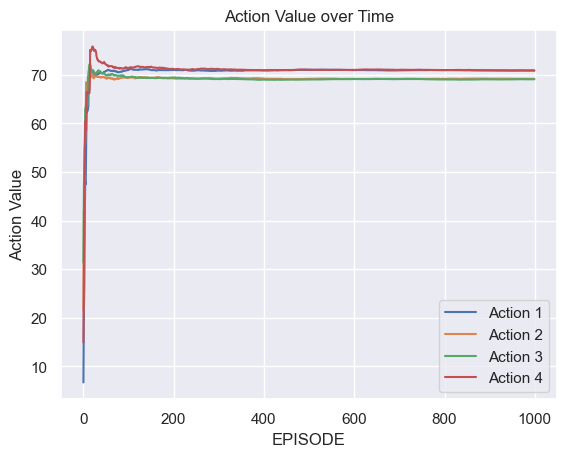

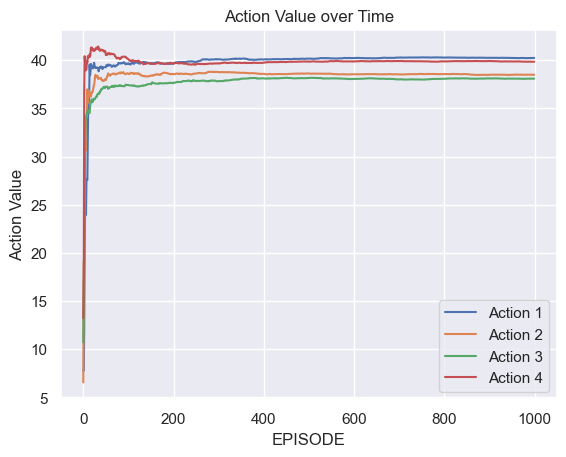

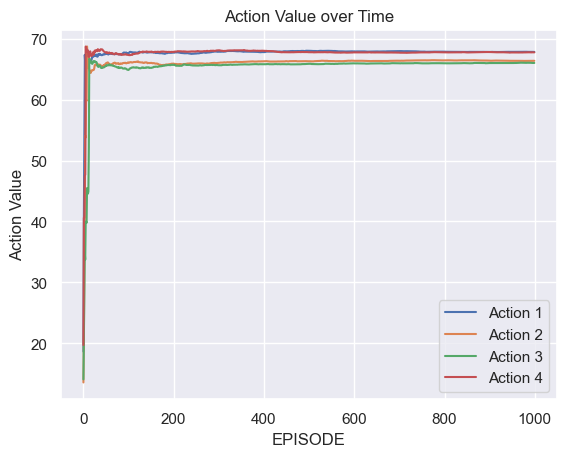

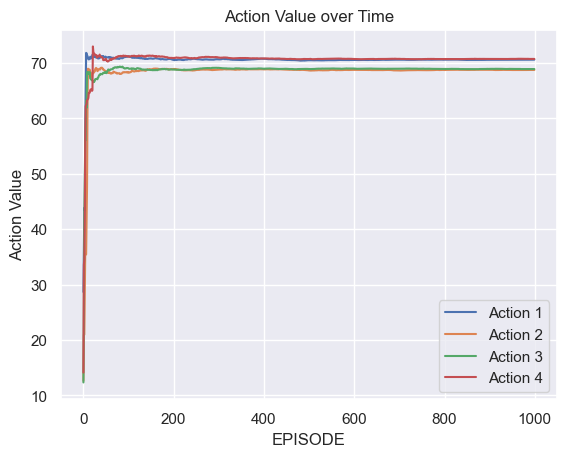

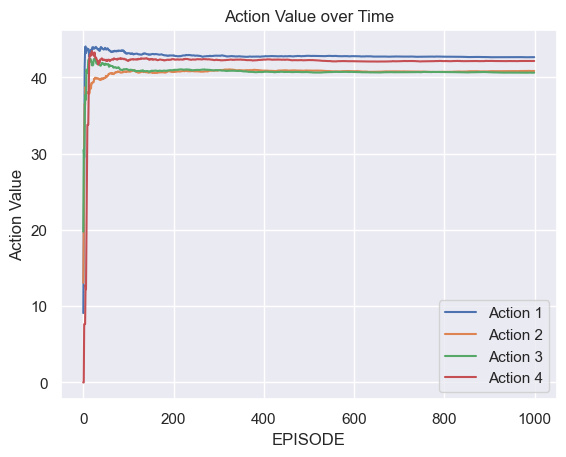

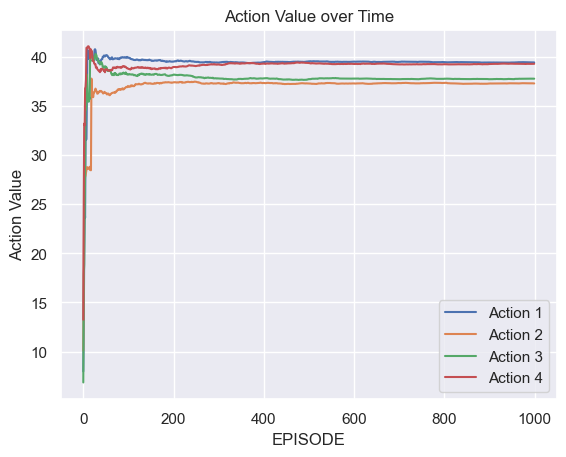

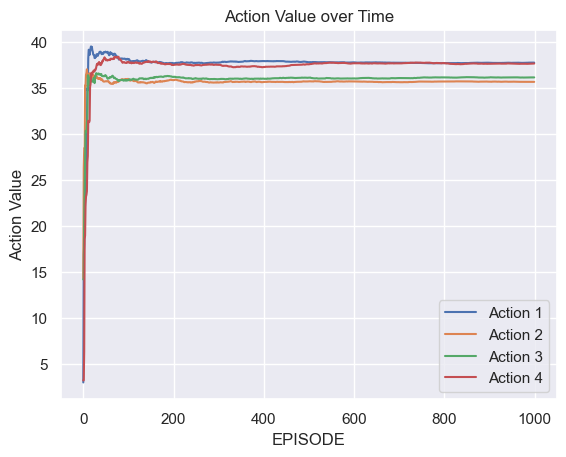

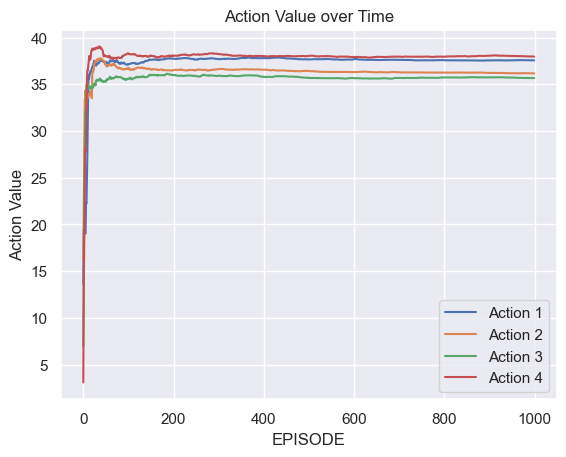

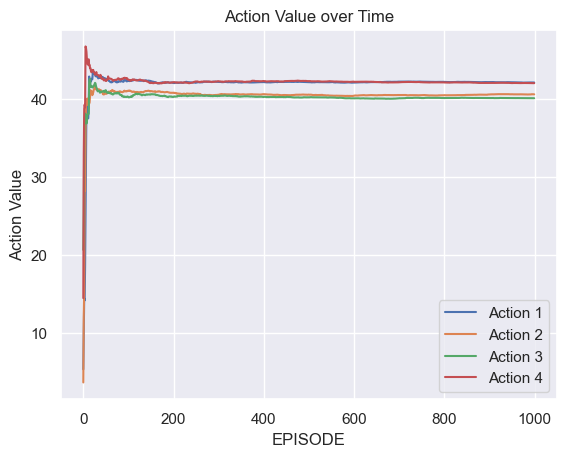

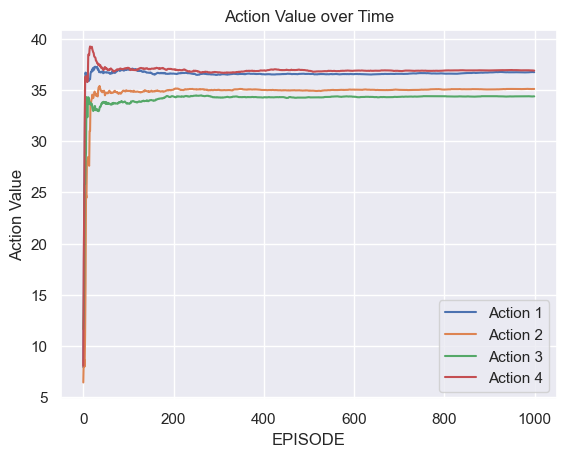

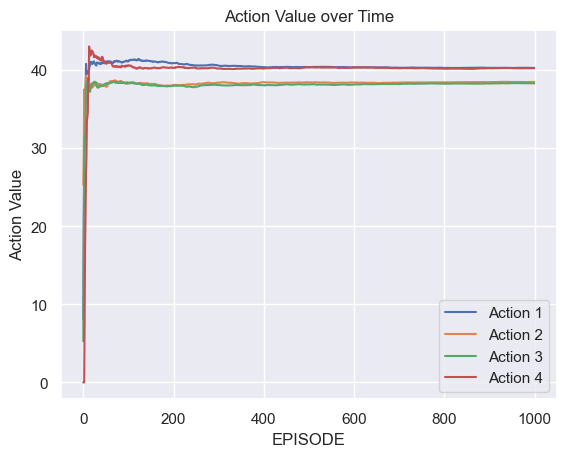

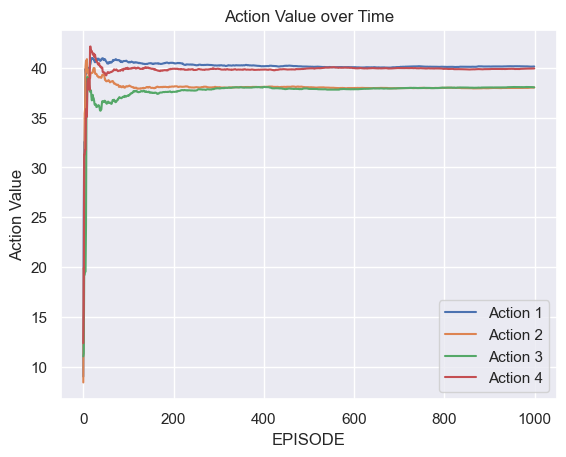

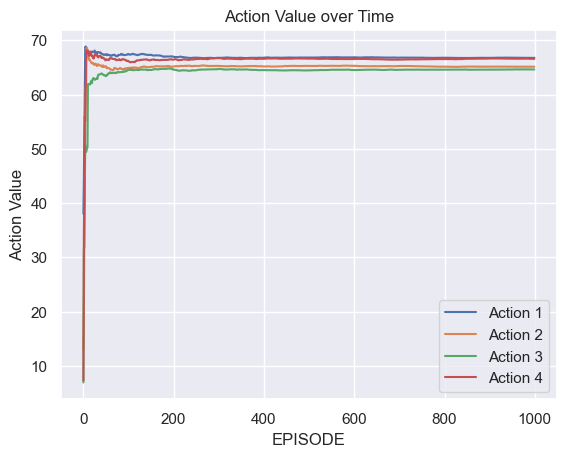

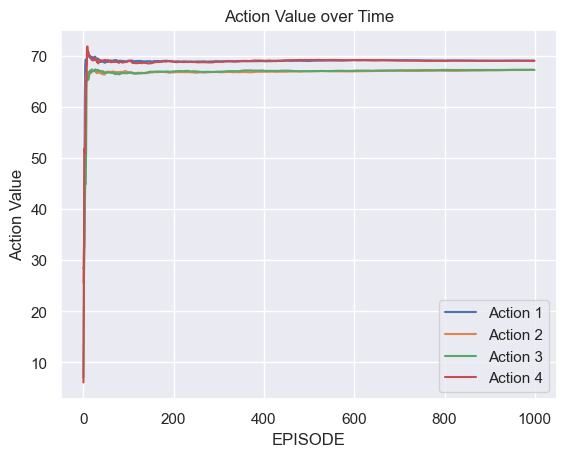

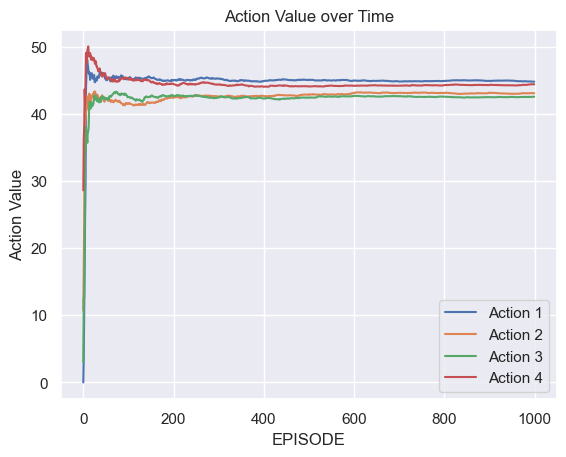

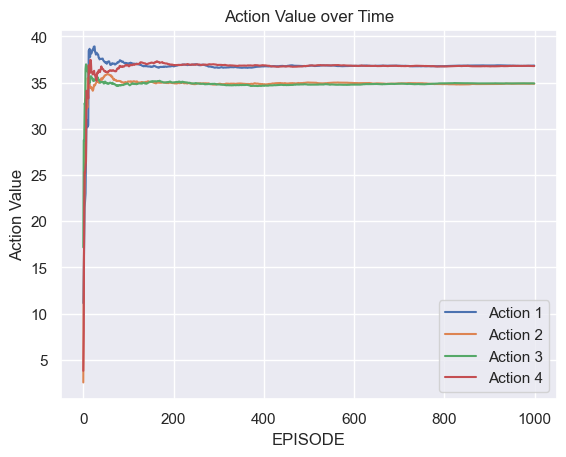

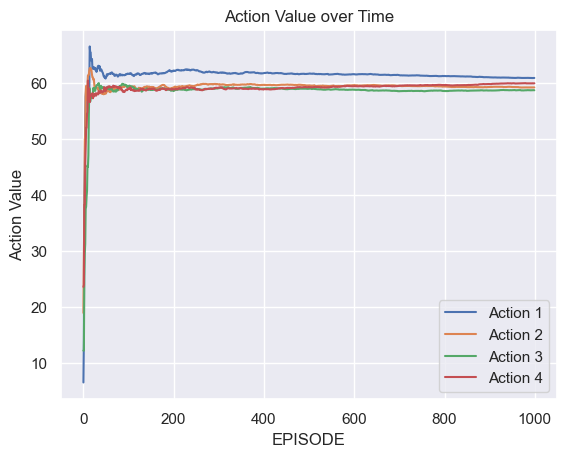

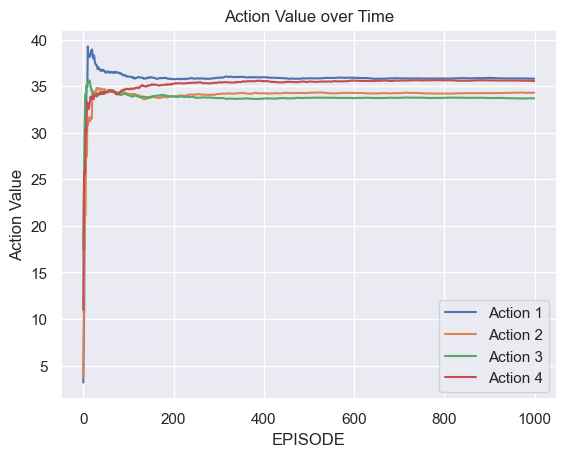

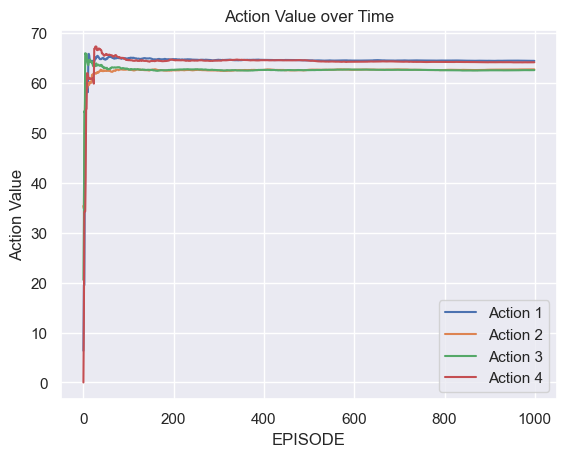

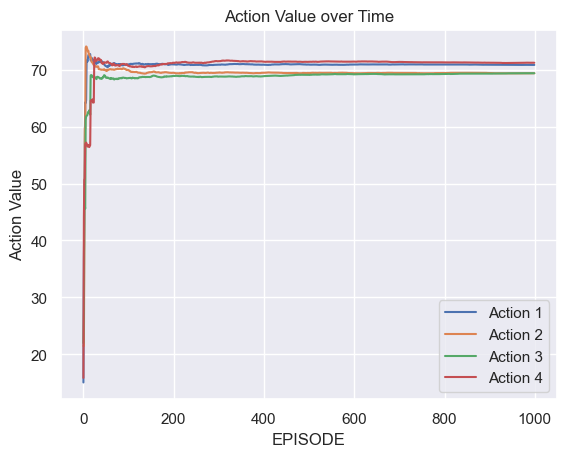

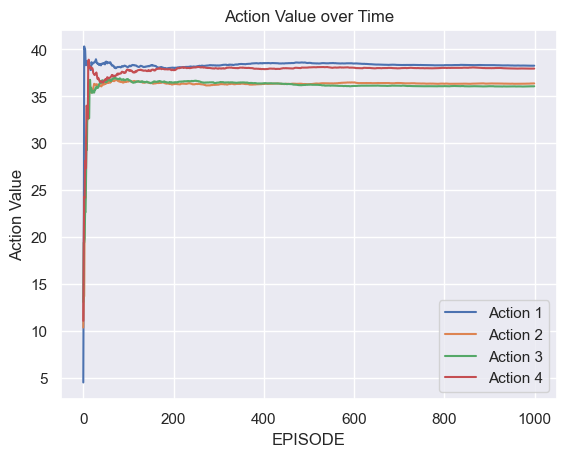

In [762]:
for idx in range(dataset.shape[0]):
    Qvalue, N = epsilon_greedy(test_dataset[idx, :], PGRADE, PEMO, max_grade, min_grade, max_emo, min_emo, PKGNUM, reps=10)
    plot_Q_overtime(Qvalue)